# Mathemathical Modelling and Machine Learning

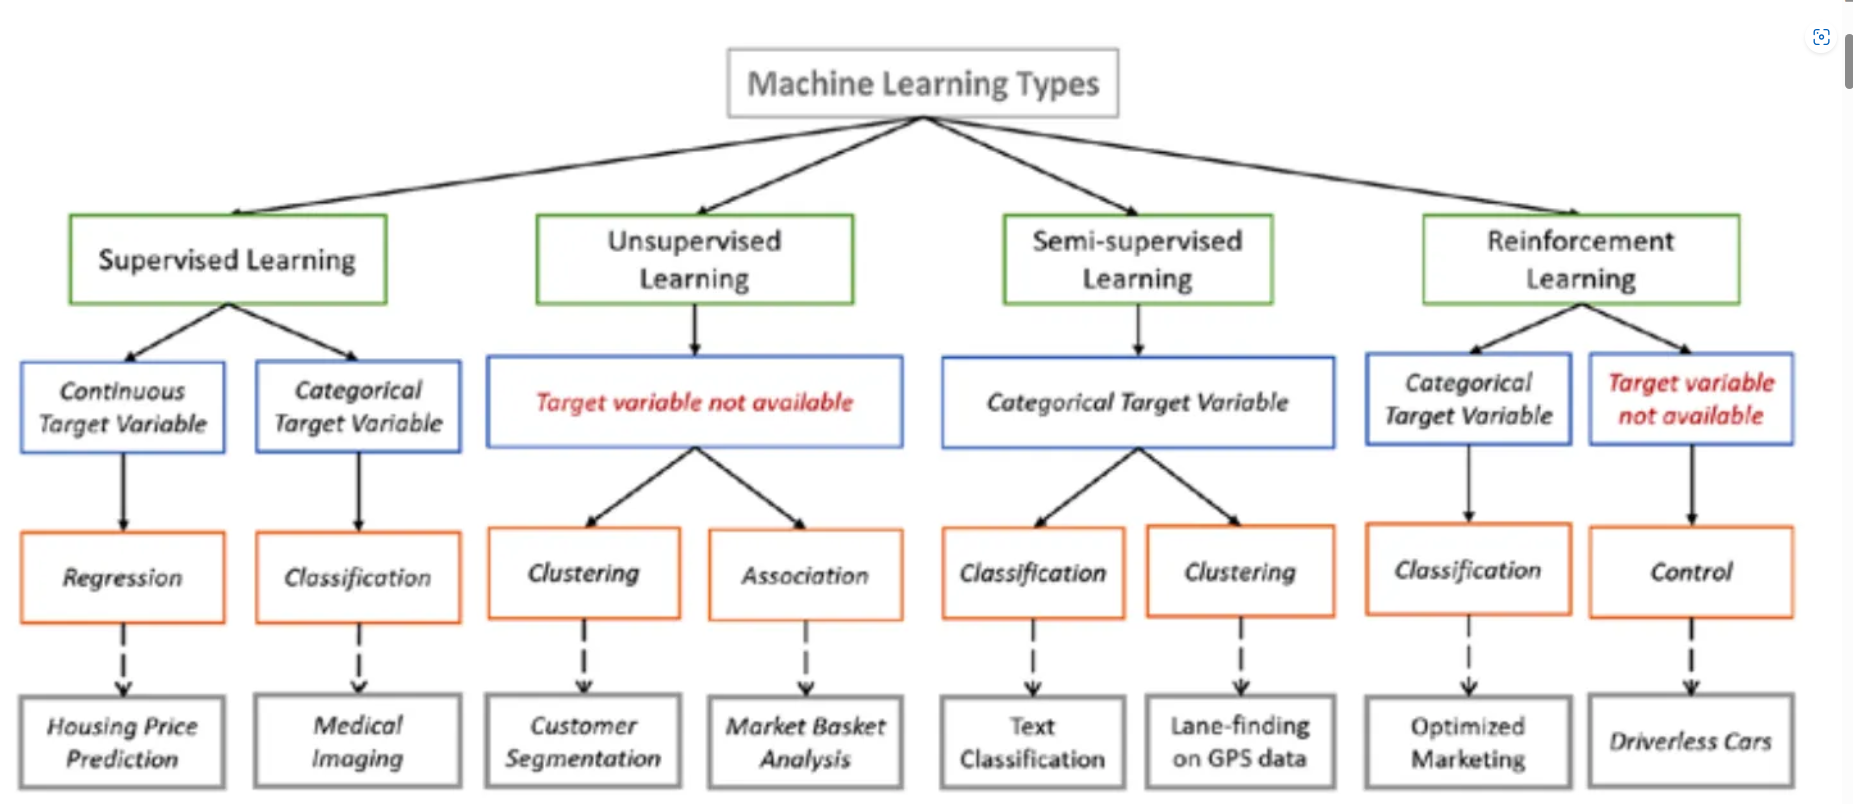

A mathematical model is a way of using math to describe, explain, or predict something in the real world. 

# Regression

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is one of them.

Regression searches for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on their features, such as experience, education level, role, city of employment, and so on.

This is a regression problem where data related to each employee represents one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.

Similarly, you can try to establish the mathematical dependence of housing prices on area, number of bedrooms, distance to the city center, and so on.

Generally, in regression analysis, you consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you try to establish a relation among them.

In other words, you need to find a function that maps some features or variables to others sufficiently well.

The dependent features are called the dependent variables, outputs, or responses. The independent features are called the independent variables, inputs, regressors, or predictors.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, or brand.

It’s a common practice to denote the outputs with 𝑦 and the inputs with 𝑥. If there are two or more independent variables, then they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.

### When Do You Use Regression?

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent experience or gender impacts salaries.

Regression is also useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

Regression is used in many different fields, including economics, computer science, and the social sciences. Its importance rises every day with the availability of large amounts of data and increased awareness of the practical value of data.



For simple understanding all you need to remember is just 4 steps:

* goal is to find the best fit for all our data points so that our predictions are much accurate.

* To get the best fit, we must reduce the Error, cost function comes into play here.

* cost function finds error.

* Gradient descent reduces error with “derivative funcion” and “alpharate”.

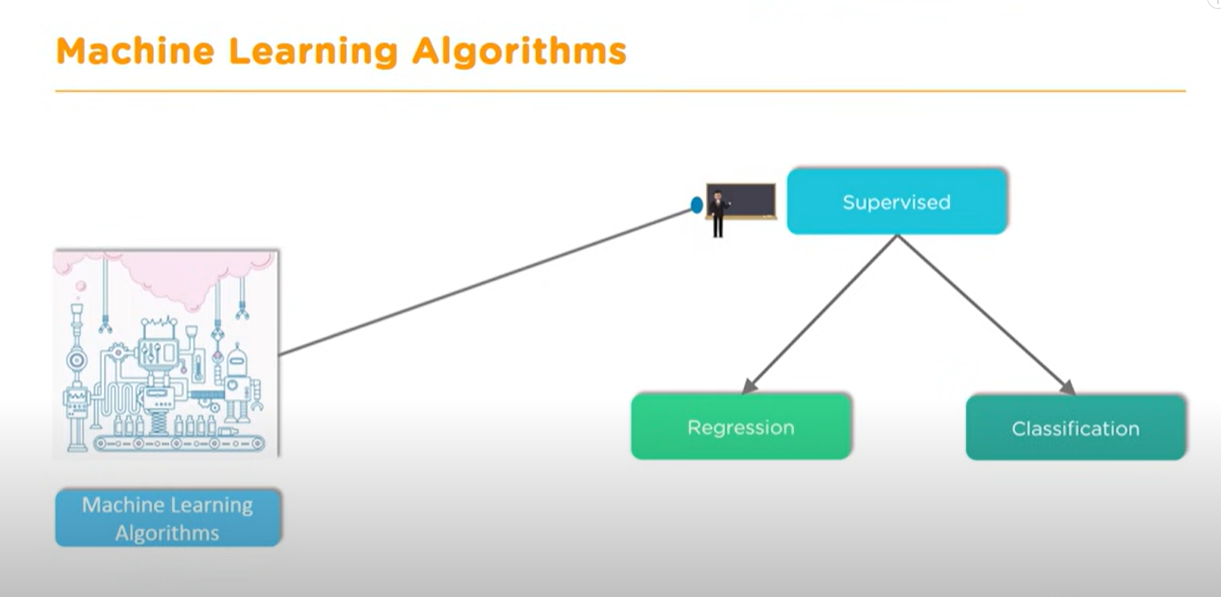

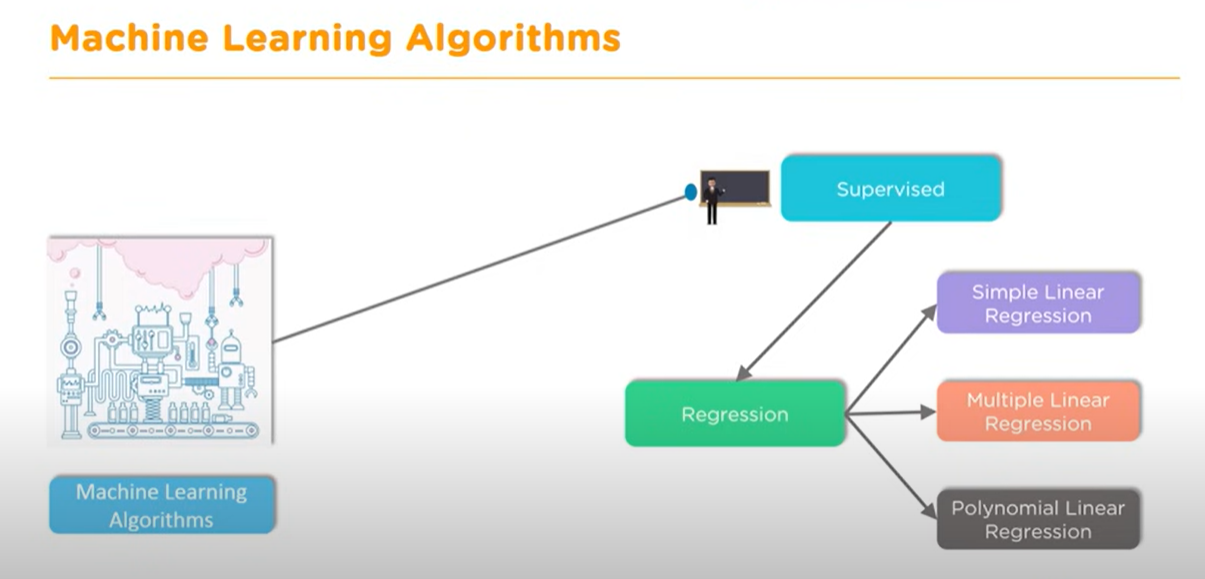

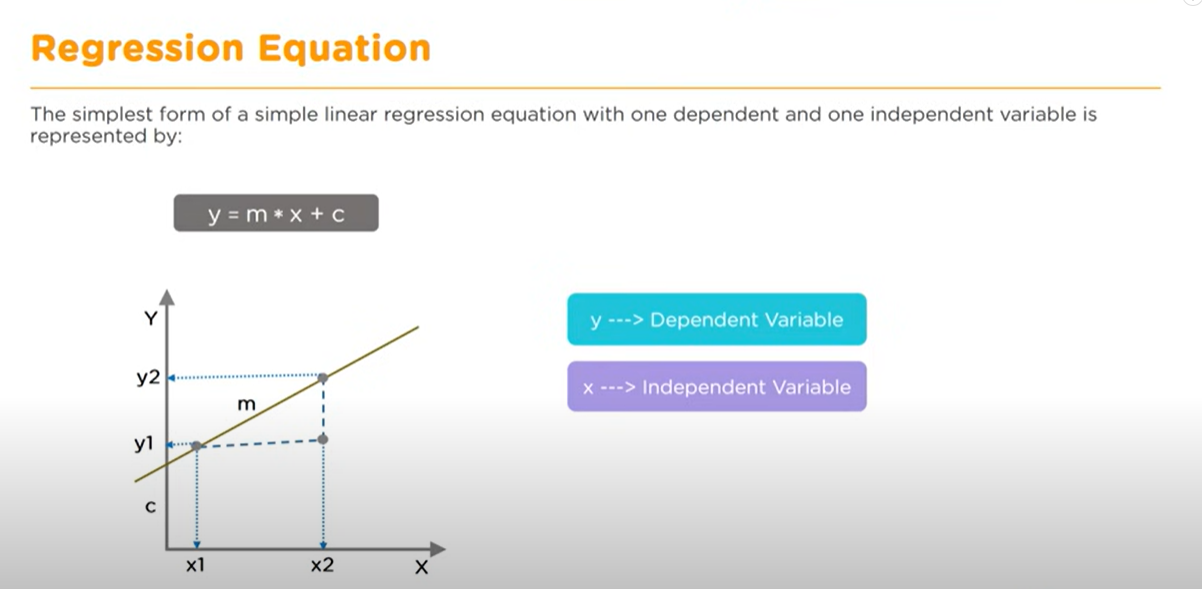

## What is the cost of a linear regression model.

Cost function measures the performance of a machine learning model for a data set. Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number. Depending on the problem, cost function can be formed in many different ways. The purpose of cost function is to be either minimized or maximized. For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.



In [1]:
# Import libraries needed to build a linear regression model using numpy

%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt


### Import the dataset

Dataset has two columns containing the amount of hours studies and the test scores achieved, respectively


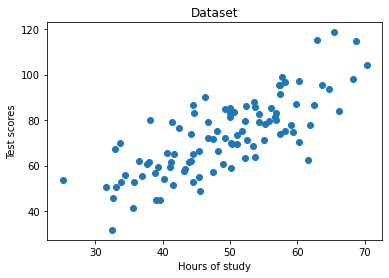

In [2]:
# code adapted from  from https://github.com/philippbauch/simple-linear-regression-notebook
df = genfromtxt('Data/studydata.csv', delimiter=',')

#Extract columns
w = array(df[:,0])
d = array(df[:,1])

#Plot the dataset
plt.scatter(w,d)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

### Model
It looks like the data might indeed be linear.

The points don't exactly fit on a straight line, but they are not far off it.

Then we can go ahead and see what would be the best line to fit the data.

### Straight lines
All straight lines can be expressed in the form 
.

The number 
 is the slope of the line.

The slope is how much 
 increases by when 
 is increased by 1.0.

The number 
 is the y-intercept of the line.

It's the value of 
 when 
 is 0.

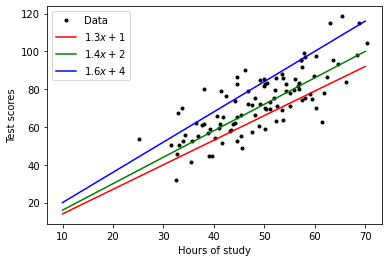

In [3]:
import numpy as np
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.These measurements are complete guesses to see which will align with the data from the study.
x = np.arange(10.0, 80.0, 10.0)
plt.plot(x, 1.3 * x + 1.0, 'r-', label=r"$1.3x + 1$")
plt.plot(x, 1.4 * x + 2.0, 'g-', label=r"$1.4x + 2$")
plt.plot(x, 1.6 * x + 4.0, 'b-', label=r"$1.6x + 4$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

# Show the plot.
plt.show()

## What is the cost of a linear regression model.

Cost function measures the performance of a machine learning model for a data set. Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number. Depending on the problem, cost function can be formed in many different ways. The purpose of cost function is to be either minimized or maximized. For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.


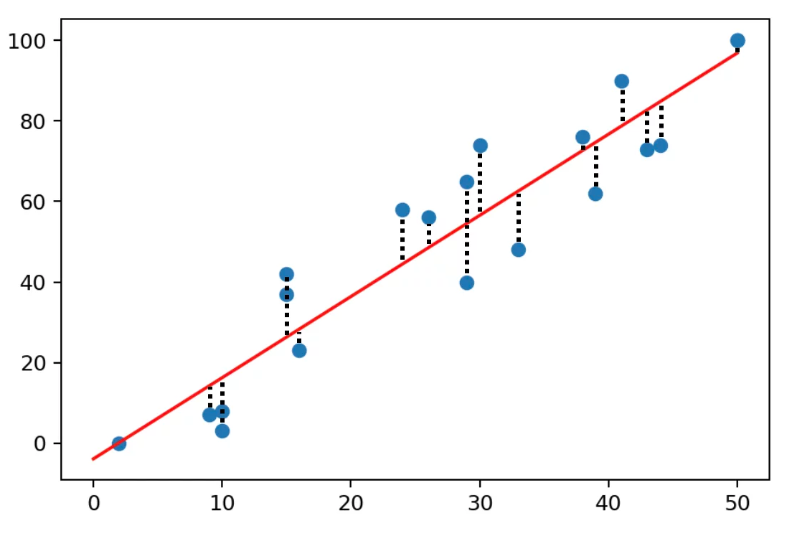







In [4]:
# Calculate the cost of the lines above for the dataset above for scores versus hours studied.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (1.3, 1.0, cost(1.3, 1.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (1.4,  2.0, cost(1.4, 2.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (1.6, 4.0, cost(1.6, 4.0)))


Cost with m =  1.30 and c =  1.00: 17574.00
Cost with m =  1.40 and c =  2.00: 11563.41
Cost with m =  1.60 and c =  4.00: 20963.01


In [5]:
# Calculate the best values for m and c manually.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 1.322431 and c is 7.991021.


In [6]:
# Using Least squares polynomial fit.
#polyfit(x,y,n) returns the coefficients for a polynomial p(x) of degree n that is a best fit (in a least-squares sense) for the data in y. The coefficients in p are in descending powers, and the length of p is n+1
np.polyfit(w, d, 1)

array([1.32243102, 7.99102099])

Both the manual calculation and polyfit calculation for cost match in the above formula's.
The best fit line is seen below on the plot with the best m+c calculations inputted.

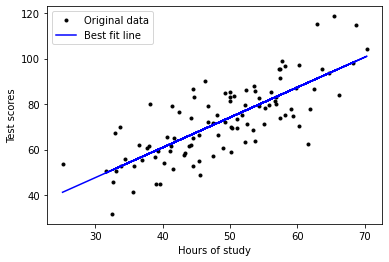

In [7]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.legend()

# Show the plot.
plt.show()

In [8]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  1.32 and c =  7.99: 11025.74


### Optimization for Linear Regressiom using scipy.optimize.minimize



All machine learning is optimization in one form or another. Using scipy to minimize the cost function. In the documentation for the scipy. optimise the cost function is defined as fun. The function we are minimising is the cost function. This must take a single argument but our cost function take two. M+C. To over come this we must put this in an array.

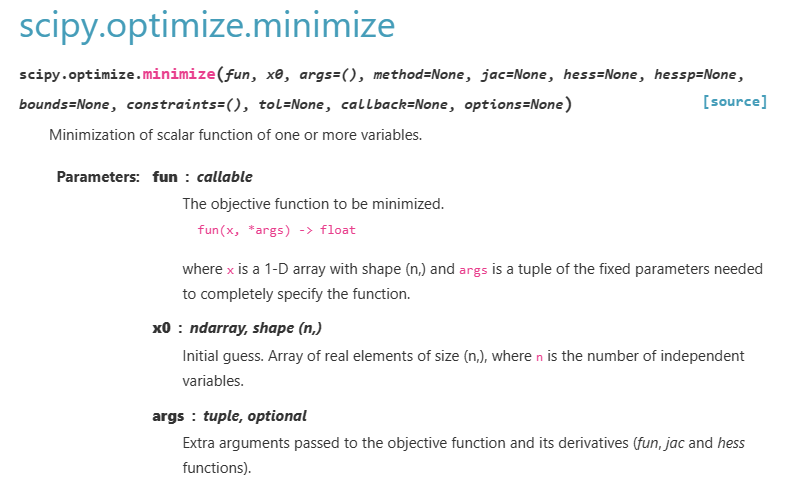


In [9]:
# Optimization package for scipy to use the minimise function. Pip install scipy in cmd if this library has not been installed previously. Conda update all in cmd to ensure packages up to date.
import scipy.optimize as so

# Numerical arrays.
import numpy as np

In [10]:
# code taken from https://github.com/philippbauch/simple-linear-regression-notebook. Same data is used here as above for hours studies versus test scores.
points = genfromtxt('Data/studydata.csv', delimiter=',')

#Extract columns-fix x and y values.x and y are have fixed values in this scenario as above.
x = array(points[:,0])
y = array(points[:,1])

In [11]:
#Defining Cost function
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

The input to the function for scipy optimize minimize need to be a 1-D arary 







In [12]:
# Run a quick test using the manual cost functions we obtained in the manual calculation of cost.
cost((1.32, 7.99))


11027.234878467696

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
# All the machine learning concepts are in this line of code.
#Below the function cost has been used as an argument and this is perfectly fine to do in python.
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 11025.738344913036
        x: [ 1.322e+00  7.991e+00]
      nit: 6
      jac: [-2.441e-04  0.000e+00]
 hess_inv: [[ 1.790e-06  5.365e-06]
            [ 5.365e-06  1.633e-05]]
     nfev: 42
     njev: 14

In [14]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(1.3224308967032947, 7.991027003483782)

In [15]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(1.3224310226878677, 7.991020985734428)

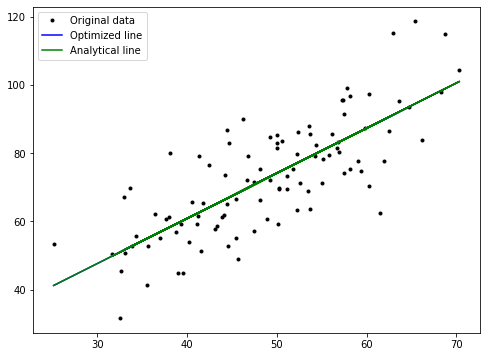

In [16]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

 Scipy Optimise Curve Fit 
Another way to look at this data is using the scipy optimise curve fit https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

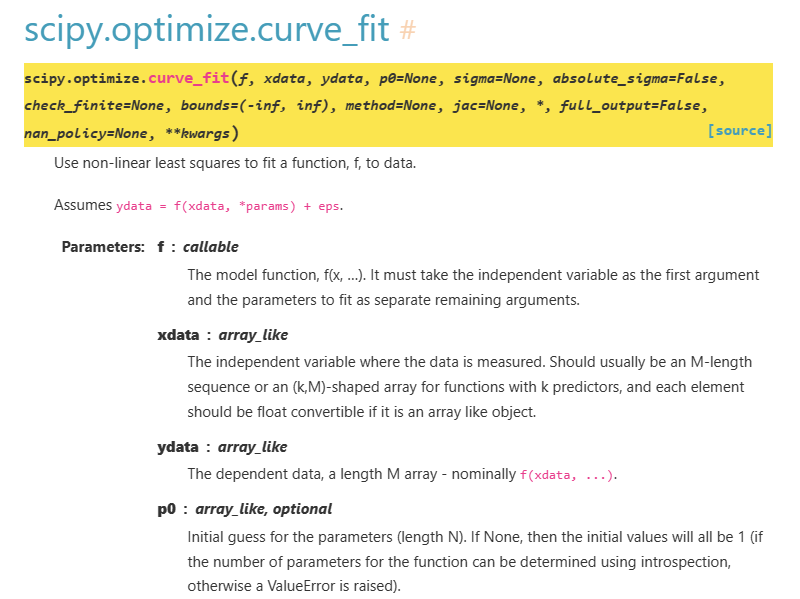



In [17]:
# Create a model function as opposed to a cost function.

def f (x,m,c):
    return m * x + c



In [18]:
result = so.curve_fit(f,x,y)
result

(array([1.322431  , 7.99102227]),
 array([[ 1.19635430e-02, -5.85715217e-01],
        [-5.85715217e-01,  2.98007207e+01]]))

The scipy optimise curve_fit reurns

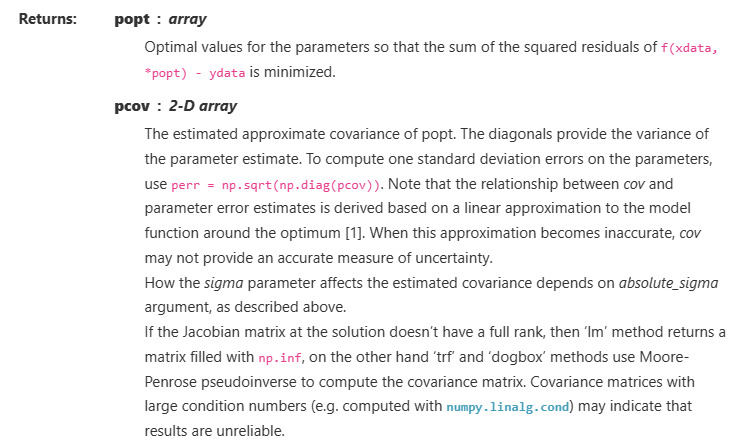

## Using scipy.stats.linregress on the same data and see what kind of result we get.

**scipy.stats.linregress(x, y=None, alternative='two-sided')[source]**

Calculate a linear least-squares regression for two sets of measurements.

**Parameters: x, yarray_like**
Two sets of measurements. Both arrays should have the same length. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2. The two sets of measurements are then found by splitting the array along the length-2 dimension. In the case where y=None and x is a 2x2 array, linregress(x) is equivalent to linregress(x[0], x[1]).

**alternative{‘two-sided’, ‘less’, ‘greater’}, optional**
Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

* ‘two-sided’: the slope of the regression line is nonzero

* ‘less’: the slope of the regression line is less than zero

* ‘greater’: the slope of the regression line is greater than zero



**Returns:**
**result: LinregressResult instance**
The return value is an object with the following attributes:

**slope:float**
Slope of the regression line.

**intercept:float**
Intercept of the regression line.

**rvalue::float**
The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.

**pvalue:float**
The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses.

**stderr:float**
Standard error of the estimated slope (gradient), under the assumption of residual normality.

**intercept_stderr:float**
Standard error of the estimated intercept, under the assumption of residual normality.

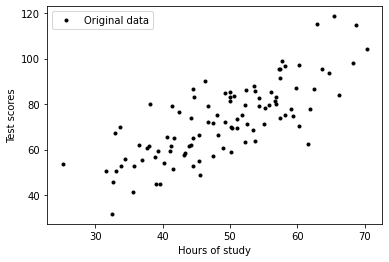

In [19]:
# PLot the original data with 
plt.plot(w, d, 'k.', label='Original data')
# Add axis labels and a legend.
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.legend()

# Show the plot.
plt.show()

In [20]:
from scipy import stats
res = stats.linregress(w, d)

In [21]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.598656


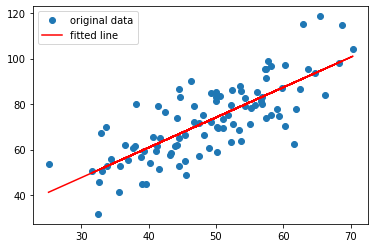

In [22]:
plt.plot(w, d, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Calculate 95% confidence interval on slope and intercept:

In [23]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

In [24]:
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")

slope (95%): 1.322431 +/- 0.217057
intercept (95%): 7.991021 +/- 10.833215


## Lets look at the same dataset using sklearn.linear_model.LinearRegression¶

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

class sklearn.linear_model.**LinearRegression**(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

**Parameters:**
**fit_intercept:bool,default=True**
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**copy_X:bool, default=True**
If True, X will be copied; else, it may be overwritten.

**n_jobs:int, default=None**
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

**positive:bool, default=False**
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

New in version 0.24.

**Attributes:**
**coef_array of shape (n_features, ) or (n_targets, n_features)**
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

**rank_:int**
Rank of matrix X. Only available when X is dense.

**singular_:array of shape (min(X, y),)**
Singular values of X. Only available when X is dense.

**intercept_:float or array of shape (n_targets,)**
Independent term in the linear model. Set to 0.0 if fit_intercept = False.

**n_features_in_:int**
Number of features seen during fit.

New in version 0.24.

**feature_names_in_:ndarray of shape (n_features_in_,)**
Names of features seen during fit. Defined only when X has feature names that are all strings.

New in version 1.0.

### scikit-learn vs SciPy: What are the differences?

ref: https://stackshare.io/stackups/scikit-learn-vs-scipy

SciPy and scikit-learn are Python libraries used for scientific computing and machine learning, respectively. They differ in their purpose, functionality, and focus. Let's explore the key differences between them:

**Functionality and Purpose:** SciPy is a comprehensive library for scientific and numerical computing in Python. It provides a wide range of modules and functions for tasks such as linear algebra, optimization, signal processing, statistics, and more. It is designed to handle mathematical computations and scientific data analysis, offering tools for numerical integration, interpolation, Fourier transforms, and linear algebra operations. On the other hand, scikit-learn is a machine learning library that focuses specifically on providing tools and algorithms for data preprocessing, supervised and unsupervised learning, model evaluation, and predictive analytics. It includes modules for tasks like classification, regression, clustering, dimensionality reduction, and model selection.

**Machine Learning Algorithms:** scikit-learn provides a diverse range of machine learning algorithms, including linear regression, logistic regression, decision trees, random forests, SVM, and k-means clustering. Its consistent interface enables effortless experimentation and performance evaluation of various models. In contrast, SciPy lacks built-in machine learning algorithms but offers essential tools for scientific computing, which can complement scikit-learn. However, it does not provide the same dedicated machine-learning functionality as scikit-learn.

**Integration with Other Libraries:** Both SciPy and scikit-learn seamlessly integrate with other Python libraries for scientific computing and data analysis. SciPy complements NumPy, extending its capabilities, and works with Matplotlib for visualization and Pandas for data manipulation. In contrast, scikit-learn tightly integrates with its own ecosystem, utilizing NumPy and SciPy, and offers a unified framework for machine learning. It also integrates with Pandas for preprocessing and Matplotlib for ML-specific visualizations.

**Focus on Scientific Computing vs. Machine Learning:** The primary focus of SciPy is on scientific computing and numerical analysis, offering a wide range of mathematical functions and algorithms. It caters to researchers, scientists, and engineers working on various scientific disciplines. Scikit-learn, on the other hand, is focused specifically on machine learning and predictive analytics tasks. It provides a user-friendly interface and a comprehensive set of tools and algorithms dedicated to solving machine-learning problems. Its focus is on enabling users to build and deploy machine learning models for real-world applications.


In summary, SciPy is a comprehensive library for scientific computing, offering a wide range of mathematical functions and modules. scikit-learn, on the other hand, is a dedicated machine-learning library, providing a rich collection of algorithms and tools specifically designed for machine-learning tasks.


The difference between Scikit-Learn and Scipy is that Scikit-Learn is a machine learning library built on top of SciPy, whereas SciPy is a collection of scientific computing tools in Python. SciPy includes functions for numerical integration and optimization, linear algebra, signal and image processing, statistics, and much more. Scikit-Learn focuses specifically on machine learning algorithms and includes tools like pre-processing, regression, classification, clustering, model selection, and many other algorithms.




In [25]:
w

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

In [26]:
#need to reshape the arrays from 1d to 2d to use the linear function in scikit-learn
#https://www.geeksforgeeks.org/convert-a-1d-array-to-a-2d-numpy-array/
arr1w = w.reshape(100, 1)

In [27]:
#need to reshape the arrays from 1d to 2d to use the linear function in scikit-learn
arr1d = d.reshape(100, 1)

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(arr1w, arr1d)

In [29]:
reg.score(arr1w,arr1d)

0.5986557915661921

In [30]:
reg.coef_

array([[1.32243102]])

In [31]:
reg.intercept_

array([7.99102099])

## Reading and References:

1. Linear Regression in Python https://realpython.com/linear-regression-in-python/

2. Linear Regression Analysis | Linear Regression in Python | Machine Learning Algorithms | Simplilearn https://www.youtube.com/watch?v=NUXdtN1W1FE

3. Regression in Python 🐍 with Scipy/GEKKO https://www.youtube.com/watch?v=3ZVRstDL9A4

4. Linear Regression Model Techniques with Python, NumPy, pandas and Seaborn https://www.youtube.com/watch?v=EMIyRmrPWJQ (link to github notebook)

5. How to do Multiple Linear Regression in Python| Jupyter Notebook|Sklearn https://www.youtube.com/watch?v=WngoqVB6cXw 
 
6. Multiple Linear Regression in Python - sklearn https://www.youtube.com/watch?v=wH_ezgftiy0 (good data set to work with)

7. Machine Learning in Python: Building a Linear Regression Model https://www.youtube.com/watch?v=R15LjD8aCzc (github link to notebook to generate models)

8. Machine Learning Tutorial Python - 2: Linear Regression Single Variable https://github.com/codebasics/py/blob/master/ML/1_linear_reg/1_linear_regression.ipynb

9. scikit-learn vs SciPy  https://stackshare.io/stackups/scikit-learn-vs-scipy 

10. Convert a 1D array to a 2D Numpy array https://www.geeksforgeeks.org/convert-a-1d-array-to-a-2d-numpy-array/

11. Intro To Linear Regression Models - Pandas For Machine Learning 26 https://www.youtube.com/watch?v=aV_sRopNTrw

12.  API Reference Statistical functions (scipy.stats) https://docs.scipy.org/doc/scipy/reference/stats.html

13. Linear Regression Made Simple : Everything You Need to Know to Get Started https://blog.gopenai.com/linear-regression-made-simple-everything-you-need-to-know-to-get-started-77cc44c98c9

14. Linear regression https://scipy-cookbook.readthedocs.io/items/LinearRegression.html

15. Machine Learning Tutorial Python - 2: Linear Regression Single Variable https://www.youtube.com/watch?v=8jazNUpO3lQ- use this as an example

16. Linear Regression in Python with Cost function and Gradient descent https://purnasaigudikandula.medium.com/linear-regression-in-python-with-cost-function-and-gradient-descent-bde9a8d2626

17. Cost Function of Linear Regression: Deep Learning for Beginners https://builtin.com/machine-learning/cost-function

18. 2223-S1-machine-learn-stats/notebooks/02-models.ipynb  https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb



### Github References 
- https://github.com/TaniaRosasOrtiz/CancerAnalysis_using_LinearRegression/blob/main/Pymaceuticals/pymaceuticals_starter.ipynb

- https://github.com/deepakshf/Statistics-Seaborn-Scipy-LinearRegression/blob/main/BMI.ipynb

- https://github.com/EDuarP/scipy-simple-linear-regression/blob/main/simple-linear-regression-scipy.ipynb

- https://github.com/abcastillo1/Jupyter-LinearRegression-Python/blob/main/Jupyter-LinearRegression-Python.ipynb
